After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head(10)


,ali,anthony,bill,bo,chad,dave,deon,fern,hasan,jamie,jim,joe,john,kevin,louis,marlon,mike,ricky,sam,tig
abc,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
able,2,0,0,0,3,0,1,0,3,1,1,2,3,0,1,0,0,0,0,1
abortion,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,2,0
abortion jokes,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
absolutely,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,3
absurdities,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0
absurdities sharp,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0
abuse,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
accent,0,0,0,0,0,0,0,5,0,0,4,1,1,0,0,0,0,0,3,0
accents,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [34]:
row = data.loc['able']
print(row)

ali        2
anthony    0
bill       1
bo         1
chad       3
dave       0
deon       1
fern       0
hasan      3
jamie      1
jim        1
joe        2
john       3
kevin      0
louis      1
marlon     0
mike       0
ricky      2
sam        0
tig        1
Name: able, dtype: int64


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('im', np.int64(72)),
  ('know', np.int64(68)),
  ('dont', np.int64(61)),
  ('thats', np.int64(34)),
  ('shit', np.int64(33)),
  ('youre', np.int64(31)),
  ('gonna', np.int64(27)),
  ('ok', np.int64(26)),
  ('lot', np.int64(24)),
  ('oh', np.int64(21)),
  ('wanna', np.int64(21)),
  ('husband', np.int64(20)),
  ('gotta', np.int64(20)),
  ('right', np.int64(19)),
  ('time', np.int64(19)),
  ('cause', np.int64(18)),
  ('women', np.int64(17)),
  ('got', np.int64(17)),
  ('day', np.int64(17)),
  ('people', np.int64(15)),
  ('pregnant', np.int64(15)),
  ('need', np.int64(14)),
  ('oh god', np.int64(14)),
  ('hes', np.int64(14)),
  ('god', np.int64(14)),
  ('tell', np.int64(13)),
  ('yeah', np.int64(13)),
  ('really', np.int64(12)),
  ('dont know', np.int64(12)),
  ('work', np.int64(12))],
 'anthony': [('humor', np.int64(3)),
  ('joke', np.int64(3)),
  ('special', np.int64(3)),
  ('transcript', np.int64(3)),
  ('gabriel iglesias', np.int64(2)),
  ('fluffy', np.int64(2)),
  ('iglesias

In [3]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
im, know, dont, thats, shit, youre, gonna, ok, lot, oh, wanna, husband, gotta, right
---
anthony
humor, joke, special, transcript, gabriel iglesias, fluffy, iglesias legend, iglesias, legend, email, ari, ari shaffir, legend fluffy, gabriel
---
bill
humor, special, transcript, iglesias, legend, email, iglesias legend, fluffy, gabriel, ari, ari shaffir, legend fluffy, gabriel iglesias, michelle
---
bo
humor, special, transcript, email, legend fluffy, ari, iglesias legend, ari shaffir, gabriel, iglesias, gabriel iglesias, legend, fluffy, michelle
---
chad
dont, know, gonna, cause, thats, youre, im, right, goes, people, think, man, oh, theyre
---
dave
know, said, im, shit, people, didnt, dont, time, thats, fuck, fucking, black, man, got
---
deon
shit, dont, aint, right, know, im, motherfucker, got, man, thats, yeah, black, girl, big
---
fern
im, dont, thats, know, cause, said, people, went, ive, think, youre, want, women, right
---
hasan
people, land, dont, know, world, doesnt, preside

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['im',
 'know',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'oh',
 'wanna',
 'husband',
 'gotta',
 'right',
 'time',
 'cause',
 'women',
 'got',
 'day',
 'people',
 'pregnant',
 'need',
 'oh god',
 'hes',
 'god',
 'tell',
 'yeah',
 'really',
 'dont know',
 'work',
 'humor',
 'joke',
 'special',
 'transcript',
 'gabriel iglesias',
 'fluffy',
 'iglesias legend',
 'iglesias',
 'legend',
 'email',
 'ari',
 'ari shaffir',
 'legend fluffy',
 'gabriel',
 'material',
 'michelle',
 'music',
 'political',
 'words',
 'shaffir',
 'sharp',
 'sharp humor',
 'societal',
 'theyre',
 'theyre just',
 'weekly',
 'humor feels',
 'humor personal',
 'discover',
 'discover weekly',
 'humor',
 'special',
 'transcript',
 'iglesias',
 'legend',
 'email',
 'iglesias legend',
 'fluffy',
 'gabriel',
 'ari',
 'ari shaffir',
 'legend fluffy',
 'gabriel iglesias',
 'michelle',
 'music',
 'political',
 'shaffir',
 'sharp',
 'sharp humor',
 'societal',
 'weekly',
 'dialogue',
 'commentcancel',
 'com

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('im', 13),
 ('know', 13),
 ('dont', 13),
 ('thats', 13),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('gonna', 10),
 ('oh', 10),
 ('time', 10),
 ('cause', 10),
 ('think', 10),
 ('got', 9),
 ('really', 9),
 ('hes', 8),
 ('said', 8),
 ('yeah', 7),
 ('humor', 7),
 ('special', 7),
 ('iglesias legend', 7),
 ('michelle', 7),
 ('music', 7),
 ('sharp', 7),
 ('sharp humor', 7),
 ('societal', 7),
 ('theyre', 7),
 ('weekly', 7),
 ('say', 7),
 ('good', 7),
 ('shit', 6),
 ('dont know', 6),
 ('transcript', 6),
 ('gabriel iglesias', 6),
 ('fluffy', 6),
 ('iglesias', 6),
 ('legend', 6),
 ('email', 6),
 ('ari', 6),
 ('ari shaffir', 6),
 ('legend fluffy', 6),
 ('gabriel', 6),
 ('political', 6),
 ('shaffir', 6),
 ('man', 6),
 ('gotta', 5),
 ('going', 5),
 ('fuck', 5),
 ('theres', 5),
 ('women', 4),
 ('day', 4),
 ('uh', 4),
 ('didnt', 4),
 ('way', 4),
 ('want', 4),
 ('look', 4),
 ('god', 3),
 ('humor feels', 3),
 ('humor personal', 3),
 ('goes', 3),
 ('black', 3),
 ('old', 3),
 ('real', 3),
 ('wen

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 10]
add_stop_words

['im', 'know', 'dont', 'thats', 'right', 'people', 'youre']

In [8]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean2.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix


cv = CountVectorizer(
    stop_words=list(stop_words), 
    ngram_range=(1,1),  # Includes unigrams #if i want bigrams i can do ngram_range=(1,2) this includes both
    min_df=2,  # this will remove words in less than 2 comedians
    max_df=0.75  #this will remove words in more than 75 percent of the comedians
)

data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

print(data_cv.shape)
print(data_stop.shape)

(20, 3598)
(20, 3598)


In [10]:
# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl2", "wb"))
data_stop.to_pickle("dtm_stop2.pkl")

In [41]:
data_stop.head
data_stop.columns

Index(['abc', 'abe', 'ability', 'able', 'abortion', 'absolute', 'absolutely',
       'abuse', 'accent', 'accents',
       ...
       'york', 'youd', 'youll', 'young', 'younger', 'youngest', 'youtube',
       'zero', 'zombie', 'zoo'],
      dtype='object', length=3598)

In [10]:
#pip install wordcloud

In [42]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


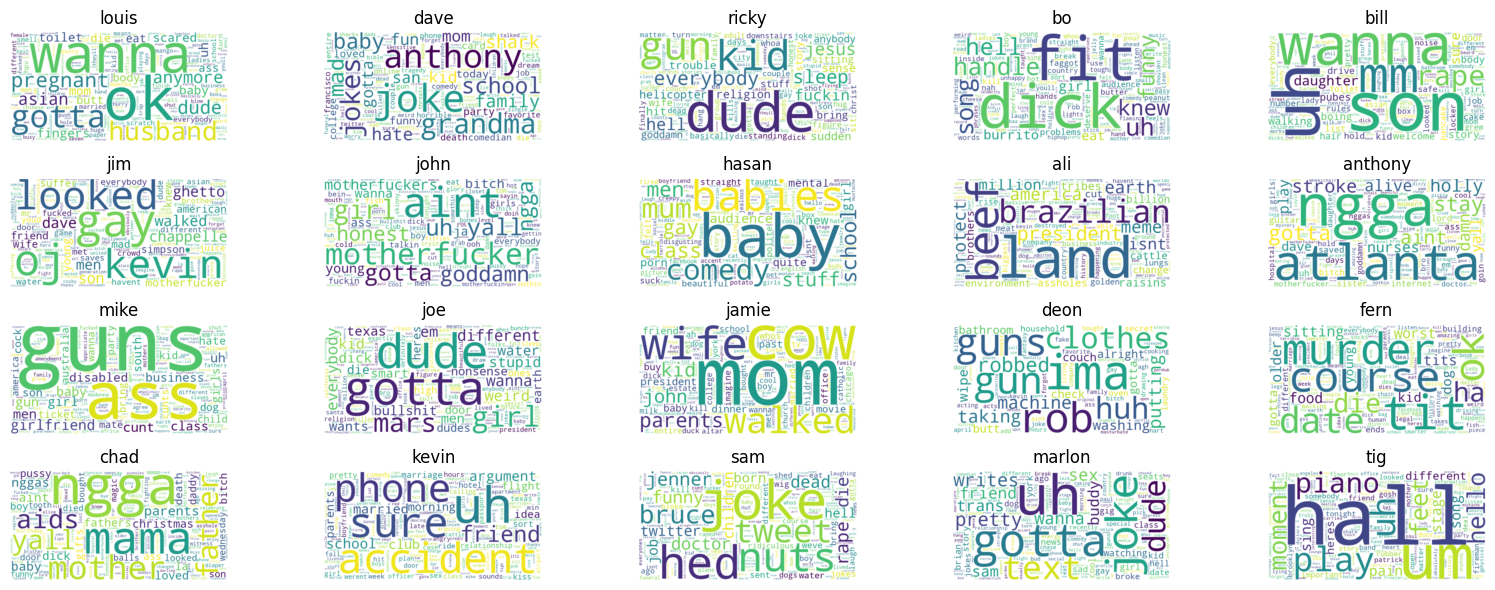

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]


not_full_names = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe','jamie','deon','fern','chad',
             'kevin','sam','marlon','tig']
# Create subplots for each comedian
for index, comedian in enumerate(data_stop.index):  # Iterate over comedian names
    word_freq = data_stop.loc[comedian].to_dict()  # Convert row to dictionary
    wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

    plt.subplot(4, 5, index + 1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(not_full_names[index])

plt.tight_layout()
plt.show()


ladies and gentlemen please welcome to the stageali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have to pee in like ten minutes but thank you everybody so much for coming um its a very exciting day for me its been a very exciting year for me i turned  this year yes thank you five people i appreciate that uh i can tell that im getting older because now when i see  girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jealous im jealous first and foremost of theirmetabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautifulinner thigh clearancewhere they put their feet together and theres that huge gap here with the light of potential just radiating through and then when they go to sleep they just go to sleep right they dont haveinsomniayet they dont know what its like to have to take a ambien or

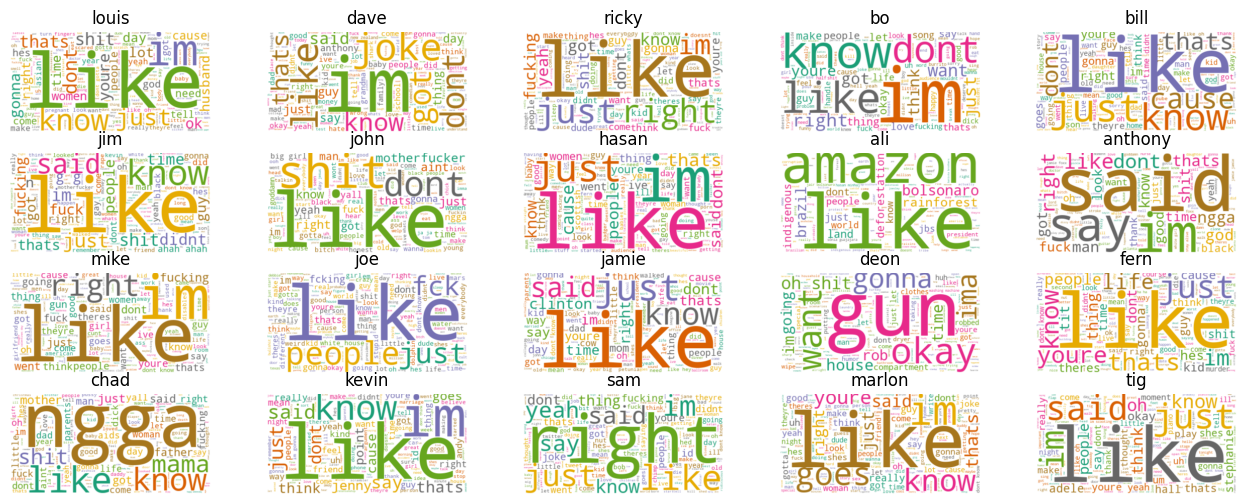

In [20]:
'''
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

not_full_names = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe','jamie','deon','fern','chad',
             'kevin','sam','marlon','tig']
# Create subplots for each comedian


#word clouds for each comedians are coming very similar in thid due to no stop word removal in transcript
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    #print(data_clean.transcript[comedian])
    plt.subplot(4, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(not_full_names[index])
    
plt.show()
'''

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

## Number of Words

### Analysis

In [44]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(not_full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
13,deon,70
8,ali,473
9,anthony,549
19,tig,598
6,john,622
1,dave,682
14,fern,726
15,chad,769
3,bo,773
0,louis,811


In [45]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [58, 67, 79, 60, 80, 77, 62, 25, 60, 59, 75, 63, 50, 65, 58, 62, 45, 55, 57, 60]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
13,deon,70,124,65,1.907692
8,ali,473,696,60,11.600000
19,tig,598,1063,60,17.716667
1,dave,682,1425,67,21.268657
5,jim,908,1784,77,23.168831
3,bo,773,1439,60,23.983333
14,fern,726,1420,58,24.482759
6,john,622,1520,62,24.516129
4,bill,939,1975,80,24.687500
9,anthony,549,1465,59,24.830508


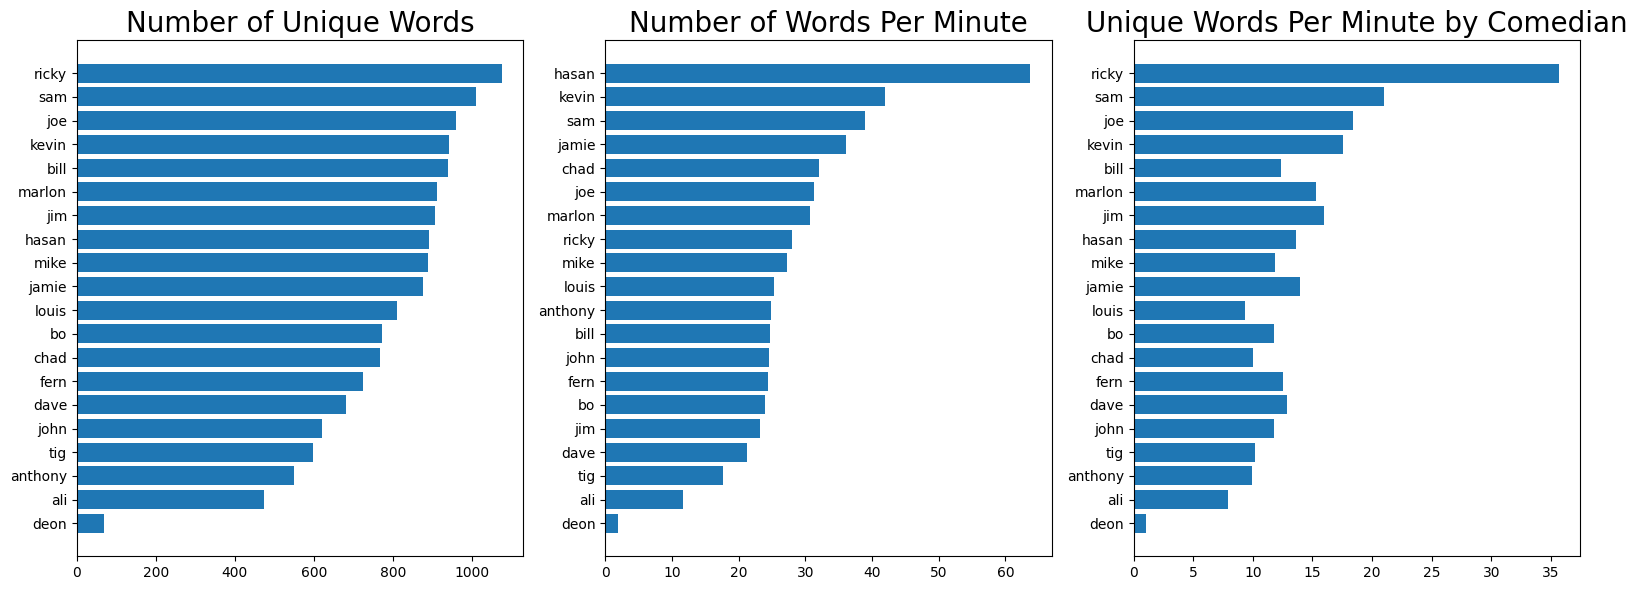

<Figure size 1600x600 with 0 Axes>

In [51]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 3, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 3, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)


# Create a new subplot for the unique words per minute plot
plt.subplot(1, 3, 3)
unique_words_per_minute=data_wpm_sort['unique_words']/data_wpm_sort['run_times']
plt.barh(y_pos, unique_words_per_minute, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Unique Words Per Minute by Comedian', fontsize=20)
plt.tight_layout()
plt.show()



plt.tight_layout()
plt.show()

## Amount of Profanity

### Analysis

In [52]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('uh', 9),
 ('kid', 9),
 ('gotta', 8),
 ('girl', 8),
 ('wanna', 7),
 ('everybody', 7),
 ('baby', 6),
 ('men', 6),
 ('different', 6),
 ('son', 6),
 ('dude', 5),
 ('ass', 5),
 ('die', 5),
 ('eat', 5),
 ('school', 5),
 ('funny', 5),
 ('story', 5),
 ('sure', 5),
 ('friend', 5),
 ('hell', 4),
 ('dick', 4),
 ('boy', 4),
 ('door', 4),
 ('gay', 4),
 ('young', 4),
 ('yall', 4),
 ('bitch', 4),
 ('mom', 3),
 ('body', 3),
 ('married', 3),
 ('joke', 3),
 ('family', 3),
 ('job', 3),
 ('gun', 3),
 ('bring', 3),
 ('goddamn', 3),
 ('wife', 3),
 ('knew', 3),
 ('kill', 3),
 ('em', 3),
 ('looked', 3),
 ('motherfucker', 3),
 ('water', 3),
 ('aint', 3),
 ('ngga', 3),
 ('girls', 3),
 ('president', 3),
 ('parents', 3),
 ('pretty', 3),
 ('ok', 2),
 ('toilet', 2),
 ('butt', 2),
 ('jokes', 2),
 ('mad', 2),
 ('hate', 2),
 ('party', 2),
 ('loved', 2),
 ('death', 2),
 ('college', 2),
 ('phone', 2),
 ('fuckin', 2),
 ('religion', 2),
 ('stuff', 2),
 ('sitting', 2),
 ('days', 2),
 ('figure', 2),
 ('song', 2),
 ('audi

In [53]:
# Let's isolate just these bad words
#data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
#ask sir is profanity a stop word ,because of no occurence of these words directly


data_bad_words = data.transpose()[['fucked','fuckin','fucker','fucks', 'shits','shitting','shitty','bullshit']]
data_profanity = pd.concat([data_bad_words.fucked + data_bad_words.fuckin+data_bad_words.fucker+data_bad_words.fucks,

                            data_bad_words.shits+data_bad_words.shitting+data_bad_words.shitty+data_bad_words.bullshit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity
# add more profanity checks

,f_word,s_word
ali,6,5
anthony,8,0
bill,17,6
bo,5,0
chad,5,3
dave,7,1
deon,15,5
fern,2,1
hasan,1,0
jamie,8,2


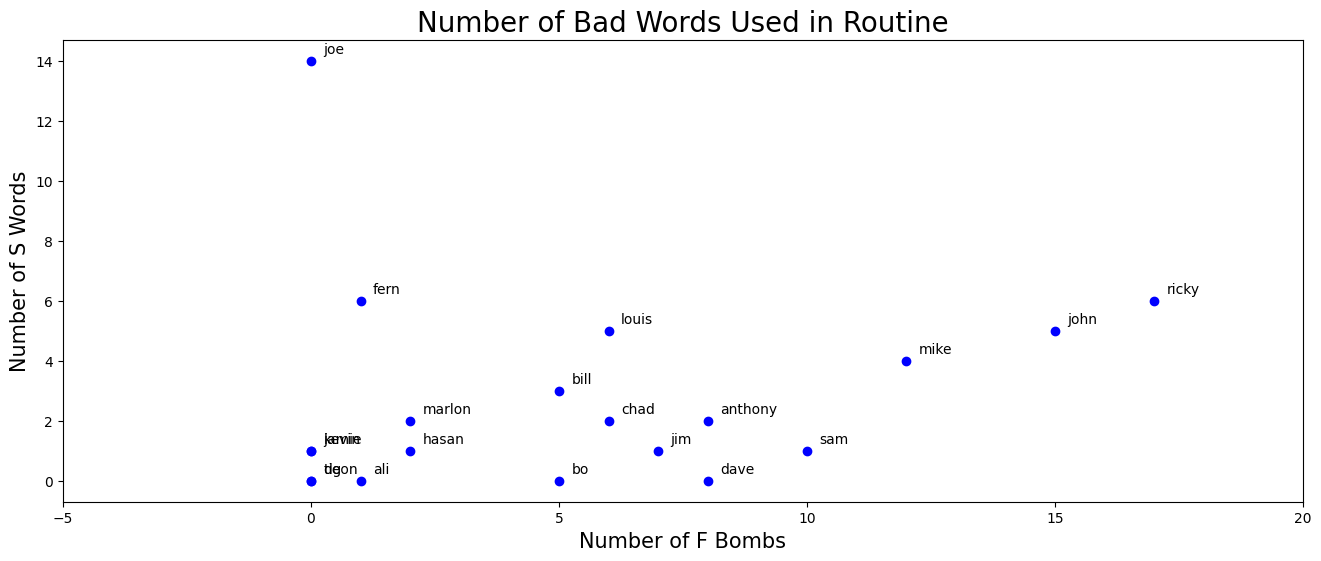

In [58]:
# Let's create a scatter plot of our findings
#plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+0.25, y+0.25, not_full_names[i], fontsize=10)
    plt.xlim(-5, 20) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()



### Findings

## Profanity Analysis of Comedians

### Joe seems to prefer the S-word  
Joe has used a lot of S-words but no F-words.  

### Clean Humor  
Fern, Hasan, Mike, Tig, John, and Sam don’t prefer to use cuss words.  

### Dirty Humor  
Comedians like Ricky, Joe, Jim, and Mike like to cuss a lot in their comedy.  


## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [59]:
#it would be interesitng to see profanity/minute to see or profanity/total words
#see which comedians also delve in political topics
print(data_profanity.index)
print(data_wpm_sort.index)



Index(['ali', 'anthony', 'bill', 'bo', 'chad', 'dave', 'deon', 'fern', 'hasan',
       'jamie', 'jim', 'joe', 'john', 'kevin', 'louis', 'marlon', 'mike',
       'ricky', 'sam', 'tig'],
      dtype='object')
Index([13, 8, 19, 1, 5, 3, 14, 6, 4, 9, 0, 10, 2, 18, 11, 15, 12, 17, 16, 7], dtype='int64')


C:\Users\hello\AppData\Local\Temp\ipykernel_24408\4137057802.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(merged_data['profanity_per_unique_word'][i], merged_data['profanity_per_minute'][i],


         profanity_per_unique_word  profanity_per_minute
ali                       0.023256              0.183333
anthony                   0.014572              0.135593
bill                      0.024494              0.287500
bo                        0.006468              0.083333
chad                      0.010403              0.129032


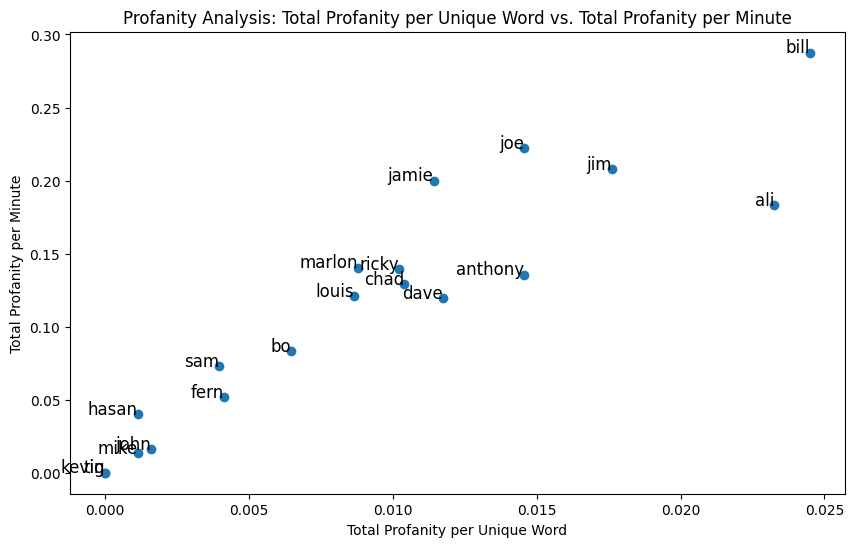

In [66]:
#data_wpm_sort.set_index('comedian', inplace=True)


# Step 1: Calculate total profanity
data_profanity['total_profanity'] = data_profanity['f_word'] + data_profanity['s_word']

# Step 2: Merge dataframes based on comedian names
merged_data = pd.merge(data_profanity, data_wpm_sort, left_index=True, right_index=True)

# Step 3: Calculate total profanity per minute and per unique word
merged_data['profanity_per_minute'] = merged_data['total_profanity'] / merged_data['run_times']
merged_data['profanity_per_unique_word'] = merged_data['total_profanity'] / merged_data['unique_words']
merged_data.drop(index='deon', inplace=True)
# Step 4: Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['profanity_per_unique_word'], merged_data['profanity_per_minute'])

# Label the points with the comedian names
for i, comedian in enumerate(merged_data.index):
    plt.text(merged_data['profanity_per_unique_word'][i], merged_data['profanity_per_minute'][i],
             comedian, fontsize=12, ha='right')

# Add labels and title
plt.title('Profanity Analysis: Total Profanity per Unique Word vs. Total Profanity per Minute')
plt.xlabel('Total Profanity per Unique Word')
plt.ylabel('Total Profanity per Minute')
print(merged_data[['profanity_per_unique_word', 'profanity_per_minute']].head())

# Display the plot
plt.show()


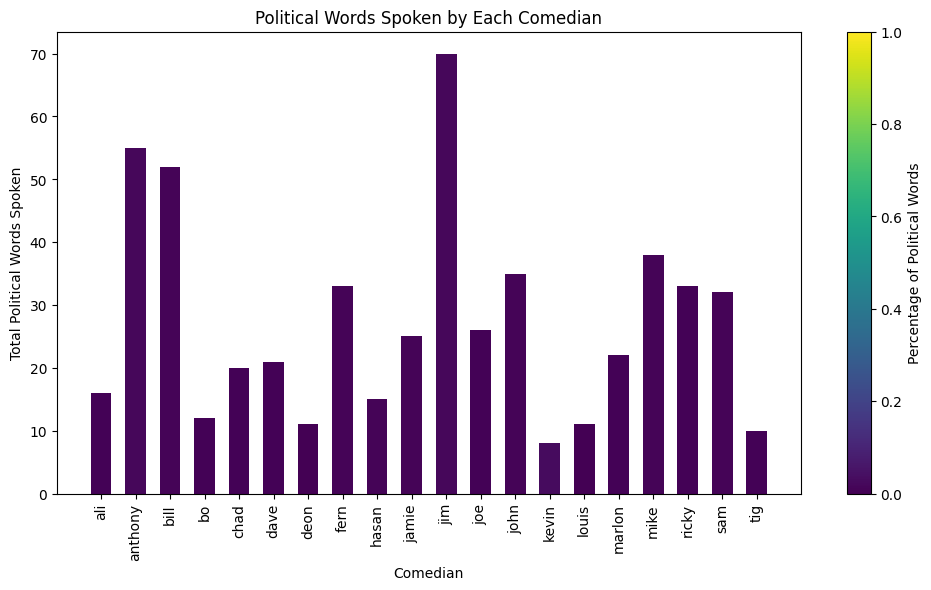

In [62]:
# Example list of political words (replace with your own list)
# Example political words (replace with your list)
political_words= [
    "justice", "woke", "cancel", "privilege", "microaggressions", "intersectionality", 
    "equality", "diversity", "climate", "change", "racism", "feminism", "lgbtq", 
    "inequality", "healthcare", "medicare", "defund", "police", "progressive", 
    "reparations", "spaces", "identity", "socialism", "inclusive", "immigration", 
    "equity", "gender", "affirmative", "action", "hate", "speech", "appropriation", 
    "freedom", "patriotism", "amendment", "gun", "rights", "life", "religious", 
    "constitutional", "family", "values", "cuts", "capitalism", "border", "security", 
    "law", "order", "marriage", "socialist", "government", "market", "exceptionalism", 
    "states", "marxism", "voter", "fiscal", "responsibility", "conservatism", "patriot", 
    "family", "nationalism", "theory", "news", "correctness", "bias", "media", "censorship", 
    "activism", "protest", "zones","abortion","communism","trump","biden","obama","harris"
]

# Step 1: Count political words for each comedian
political_counts = []

# Loop through each comedian (index in data_stop)
for comedian in data_stop.index:
    count = 0
    # Loop through each political word
    for word in political_words:
        # Add the word count for the political word, use 0 if the word is not found
        count += data_stop.at[comedian, word] if word in data_stop.columns else 0
    political_counts.append(count)

data_stop['total_political_words'] = political_counts
data_stop['total_words'] = data_stop.sum(axis=1)
data_stop['political_words_percentage'] = data_stop['total_political_words'] / data_stop['total_words']
plt.figure(figsize=(12, 6))

# Create a bar plot for the total political words spoken by each comedian
bars = plt.bar(data_stop.index, data_stop['total_political_words'], 
               color=plt.cm.viridis(data_stop['political_words_percentage']), width=0.6)

# Add labels and title
plt.title('Political Words Spoken by Each Comedian')
plt.xlabel('Comedian')
plt.ylabel('Total Political Words Spoken')

# Add a colorbar for the percentage of political words
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=plt.gca())
cbar.set_label('Percentage of Political Words')

plt.xticks(rotation=90)

plt.show()

C:\Users\hello\AppData\Local\Temp\ipykernel_24408\242399052.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data_stop['total_political_words'][i], data_stop['total_words'][i], comedian, fontsize=9, ha='right')


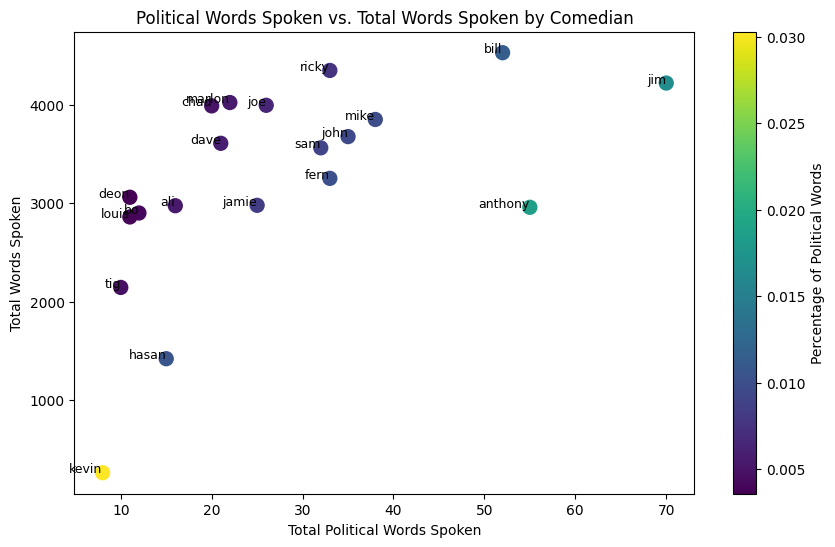

In [63]:
import matplotlib.pyplot as plt
import pandas as pd


data_stop['political_words_percentage'] = data_stop['total_political_words'] / data_stop['total_words']

# Step 5: Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with total political words vs total words
plt.scatter(data_stop['total_political_words'], data_stop['total_words'], 
            c=data_stop['political_words_percentage'], cmap='viridis', s=100)

# Label the points with comedian names
for i, comedian in enumerate(data_stop.index):
    plt.text(data_stop['total_political_words'][i], data_stop['total_words'][i], comedian, fontsize=9, ha='right')

plt.title('Political Words Spoken vs. Total Words Spoken by Comedian')
plt.xlabel('Total Political Words Spoken')
plt.ylabel('Total Words Spoken')

plt.colorbar(label='Percentage of Political Words')
plt.show()


In [65]:
print('a')

a
